<a href="https://colab.research.google.com/github/Kim-JungHyun01/AIStudy24/blob/master/%ED%85%8C%EC%8A%A4%ED%8A%B8/k_%EC%B5%9C%EA%B7%BC%EC%A0%91_%ED%95%99%EC%8A%B5%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI학습과정 정리

## 데이터(샘플)

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

## 데이터 준비

- 입력데이터 : input
- 정답데이터 : target
- 훈련용 : train
- 평가용 : test

    ex) train_input

### zip()

#### 입력데이터

In [ ]:
fish_date = [[l,w] for l,w in zip(length, weight)]

#### 정답데이터

In [ ]:
fish_target = [1] * 35 + [0] * 14

### import numpy as np

#### 샘플 : .column_stack

In [ ]:
fish_data = np.column_stack((fish_length,fish_weight))

#### 정답 : .ones() & zeros() & .concatenate()

In [ ]:
#.concatenate : 가로배열(1차배열)
fish_target = np.concatenate((np.ones(35),np.zeros(14)))

## 데이터 분류 전처리

### .shape()

In [ ]:
#배열 크기 알려주는 메서드 : .shape()
print(input_arr.shape) #(샘플수, 특성수 : 길이, 무게)

### .random() & .seed()

In [ ]:
#샘플 랜덤 섞어서 사용 : .random
#랜덤하게 섞는 기준을 정하는 것(수업용) : .seed
np.random.seed(42)
index = np.arange(49)       #0~48까지 1씩 증가하는 배열
np.random.shuffle(index)    #해당 배열을 무작위로 섞음
print(index)    #섞인 index 출력

In [ ]:
#훈련데이터 :35개
train_input = input_arr[index[:35]]     #샘플
train_target = target_arr[index[:35]]   #정답

#평가데이터 : 14개
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [ ]:
#넘파이랜덤인덱스 = 처음만든 익덱스 비교
print(input_arr[13], train_input[0])

### sklearn / train_test_split

train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)
<br/><br/>
Parameter

1. arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)

2. test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)

3. train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)

4. random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력/ .seed()) => 수업용

5. shuffle : 셔플여부설정 (default = True)

6. stratify : 지정한 Data의 비율을 유지한채 데이터 셋을 spilt함(75%, 25%)


Return
- 튜블데이터

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print(train_input.shape, test_input.shape)

#### .reshape()

2개의 특성(길이, 무게)로 사용했었기 때문에 자연스럽게 열이 2개인 2차원배열을 사용했었지만,
이번에는 특성이 1개로 수동으로 2차원배열을 만들어야함->numpy.reshape()
- (4,) -> (2,2)크기로 바꿔줌

-1 : 지정하면 원소개수로 모두 채우라는 의미(매번 원소의 크기를 외우지 않아도 됨)

1 : 정답데이터가 없기때문에 전부 정답인 것으로 하겠다는 의미

In [ ]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

### 표준편차(Z점수)

각 특성값이 평균에서 표준편차의 몇배만큼 떨어져 있는지 나타냄

- 변환해야하는 값 : 입력데이터(input), 정답데이터(target), 추가데이터(.predict_결과를 알고 싶은 것)

편차 : 변한 값 - 평균

분산 : 편차제곱의 합의 평균

표준편차 : 분산을 제곱근한 값

표준점수 : 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지 나타낸 값

<img src = "https://cloudfront-ap-northeast-1.images.arcpublishing.com/chosun/LVUWWQIG4DH6A6GFH7YBMB73LY.jpg">
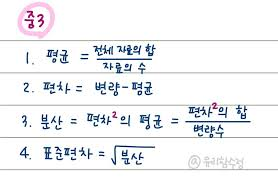

- axis : 중심선(기준선)
    - 1차배열 : 없음
    - 2차배열 : axis0 -> 행(위 -> 아래), axis1 -> 열(좌 -> 우)
    - 3차배열 : axis0 -> 높이, axis1 -> 행, axis3 -> 열

In [ ]:
#평균 & 표준편차
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [ ]:
#scaled : 뼈대(트레이닝 뼈대를 만드는 변수)
train_scaled = (train_input - mean)/std #표준점수

## 훈련(k-최근접 알고리즘)

### 훈련시작

k-최근접 알고리즘

- 분류 : from sklearn.neighbors import **KNeighborsClassifier**
    
    => 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율(정확도) -> 예측값

- 회귀 : from sklearn.neighbors import **KNeighborsRegressor**
   
    => 평가결과 : 결정계수(R^2)_타깃의 평균 정도를 예측하는 수준(0~1 : 에측이 정확할수록 1에 가까움)
    
    => R^2 = 1- {(타깃-예측)^2의 합 / (타깃-평균)^2의 합}

In [ ]:
#분류 객체생성
kr = KNeighborsClassifier()

# 회귀 객체생성
knr = KNeighborsRegressor()

#훈련시작(훈련입력데이터, 훈련정답데이터)
knr.fit(train_input, train_target)

#### n_neighbors

In [ ]:
#참고데이터 수 지정 : n_neighbors = ??? (기본값 : 5개)
kn49= KNeighborsClassifier(n_neighbors =49)
#참고데이터를 49개로 한 모델 kn49변수

### 훈련평가

평가 종류
1. 과대적합

    훈련세트보다 테스트 세트에서 점수가 **너무** 낮을 경우
    
    점수가 **100%(90%이상이면)**인 경우

2. 과소적합

    훈련세트보다 테스트세트가 점수가 **높은** 경우
    
    두 점수가 **모두 낮은** 경우

In [ ]:
#훈련점수확인
print("train : ",knr.score(train_input, train_target))
print("test  : ",knr.score(test_input, test_target))

#### .predict()

In [ ]:
#추가적인 데이터를 넣는 것
kn.predict([[5,15]])

#### 참고데이터 길이확인

In [ ]:
# 추가적인 데이터 길이 및 인덱스
distances, indexes = kn.kneighbors([[25,150]])

#k-근접 알고리즘의 참고데이터 5개
print("참고데이터 : ")
print(train_input[indexes])
print()
print("정답데이터 : ",train_target[indexes])
print()
print("거리 : ",distances)

#### 회귀 : 결정계수_R^2

In [ ]:
# mean_absolute_error : 절대값 오차를 평균하여 반환
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측(prediction)
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)

print(mae)
# 결론 : 타깃과 예측값 사이의 차이

### 회귀 : 기본값조정_재훈련진행

In [ ]:
knr = KNeighborsRegressor()

#5~45까지 x좌표를 만듬
x= np.arange(5,45).reshape(-1,1)

#참고갯수조정 : 1,3,5,10
for n in [1,3,5,10]:
    knr.n_neighbors = nㄸ
    knr.fit(train_input, train_target)

    #지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)

    #훈련세트와 예측 결과 그래프
    plt.scatter(train_input, train_target)  #점
    plt.plot(x, prediction) #실선
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel("length")
    plt.ylabel("weight")
    plt.show()

## 그래프 표현

In [ ]:
import matplotlib.pyplot as plt #그래프 패키지
plt.title() #차트 제목
plt.scatter() #차트 값넣기
plt.xlabel() #x축 이름
plt.ylabel() #y축 이름
plt.xlim() #x축 범위
plt.ylim() #y축 범위
plt.show() #그래프 보이기_꼭있어야함

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
"""
[[1, 2],
 [3, 4],
 [5, 6]]

[:,0] : 행, 열

 train_input[:,0] : [1,3,5]
 train_input[:,1] : [2,4,6]
"""

마크모양 : marker

색 : color

# 범외

## 한글폰트적용

리눅스 명령어 실행후 -> 메뉴 -> 런타임 -> 세션다시시작 -> 그래프실행

In [ ]:
#리눅스 명령어 : 코랩의 가상머신(한글 나눔폰트 폰트적용)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') # 한글처리